In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
dataset=pd.read_csv(r'e2.csv')
dataset

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0
...,...,...,...,...,...,...,...,...,...
9995,708,Commercial,1365.0,76,77,22,23,0,885.0
9996,2960,Residential,3332.0,22,72,100,47,54,3081.0
9997,3942,Commercial,2427.0,61,43,48,49,0,3325.0
9998,3211,Commercial,4639.0,72,73,105,55,0,2892.0


In [46]:
if 'structure type' in dataset.columns:
    dataset = dataset.drop(columns=['structure type'])

In [47]:
if 'site area' in dataset.columns:
    dataset = dataset.drop(columns=['site area'])

In [48]:
dataset

,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,2519.0,69,52,188,1,72,1420.0
1,2324.0,50,76,165,65,261,3298.0
2,2701.0,20,94,198,39,117,3115.0
3,1000.0,13,60,74,3,35,1575.0
4,5990.0,23,65,32,57,185,4301.0
...,...,...,...,...,...,...,...
9995,1365.0,76,77,22,23,0,885.0
9996,3332.0,22,72,100,47,54,3081.0
9997,2427.0,61,43,48,49,0,3325.0
9998,4639.0,72,73,105,55,0,2892.0


In [87]:
X=dataset[['water consumption','recycling rate','utilisation rate','air qality index','issue reolution time','resident count']]
y=dataset['electricity cost']



In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [95]:
model.coef_

array([ 0.34302702, -0.36384578, 10.87778899,  0.31400697,  2.31296476,
        1.81627211])

water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
dtype: int64


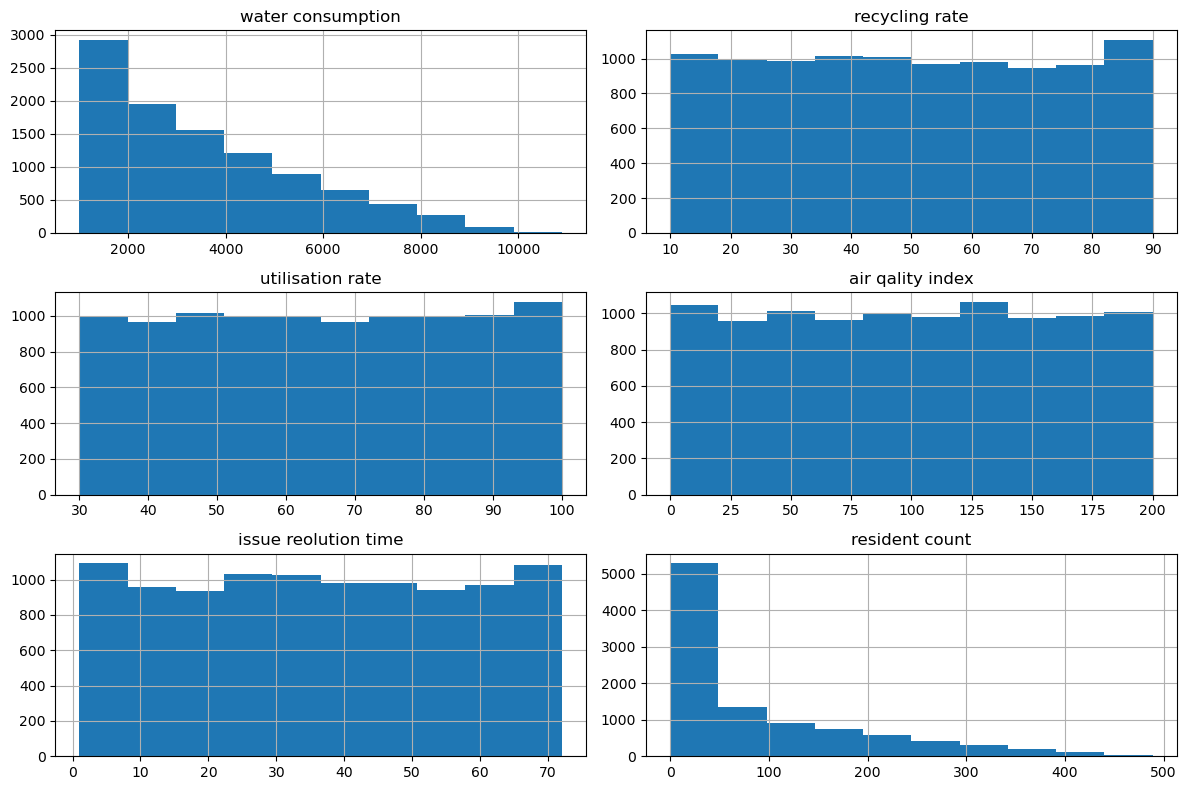

                      water consumption  recycling rate  utilisation rate  \
water consumption              1.000000        0.006977          0.008711   
recycling rate                 0.006977        1.000000         -0.022350   
utilisation rate               0.008711       -0.022350          1.000000   
air qality index               0.000929       -0.011125         -0.008747   
issue reolution time           0.007786       -0.005641         -0.000795   
resident count                 0.281256       -0.008540          0.012424   

                      air qality index  issue reolution time  resident count  
water consumption             0.000929              0.007786        0.281256  
recycling rate               -0.011125             -0.005641       -0.008540  
utilisation rate             -0.008747             -0.000795        0.012424  
air qality index              1.000000             -0.027277        0.013728  
issue reolution time         -0.027277              1.000000     

In [101]:
# Check for missing values
print(X.isnull().sum())

# Handle m issing data if needed
X = X.fillna(X.mean())  # Simple imputation

# Check feature distributions
X.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Check correlations (important for multiple regression)
corr_matrix = X.corr()
print(corr_matrix)

model.intercepty_

In [102]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Absolute_Impact': np.abs(model.coef_)
}).sort_values('Absolute_Impact', ascending=False)

print(coefficients)

                Feature  Coefficient  Absolute_Impact
2      utilisation rate    10.877789        10.877789
4  issue reolution time     2.312965         2.312965
5        resident count     1.816272         1.816272
1        recycling rate    -0.363846         0.363846
0     water consumption     0.343027         0.343027
3      air qality index     0.314007         0.314007


R² Score: 0.560
MSE: 549296.97
RMSE: 741.15


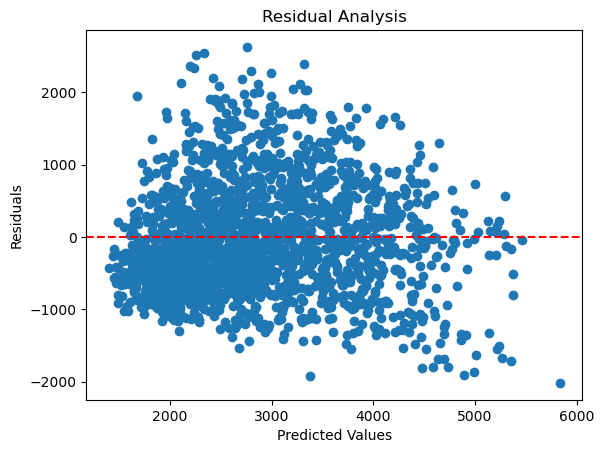

In [103]:
y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Residual plot (NEW)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()